# Yolo Examples
This Notebook shall show you, how to use Yolo/Ultralytics to find objects in imags.

## Detection
### Preparing your environment
Let's start with importing Yolo and some sample data.

In [17]:
from ultralytics import YOLO
import kagglehub

# Download some sample data
path = kagglehub.dataset_download("pavansanagapati/images-dataset")

print("Path to dataset files:", path)

# Load a model
model = YOLO("yolo11m.pt")  # pretrained YOLO11n model

# select sample images
sample_image01 = path + "/data/cars/carsgraz_391.bmp"
sample_image02 = path + "/data/cars/carsgraz_390.bmp"

Path to dataset files: /home/markus/.cache/kagglehub/datasets/pavansanagapati/images-dataset/versions/1


### Run Detection
Now as we have downloaded a Yolo model and sample images, let's run detection on two images.

In [15]:
# Run batched inference on a list of images
results = model([sample_image01, sample_image02])  # return a list of Results objects

# Process results list
for idx,result in enumerate(results):
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.save(filename="result-" + str(idx) + ".jpg")  # save to disk


0: 480x640 2 cars, 1 potted plant, 5.9ms
1: 480x640 3 cars, 5.9ms
Speed: 2.1ms preprocess, 5.9ms inference, 3.8ms postprocess per image at shape (1, 3, 480, 640)


That seems to have worked - let's show images and see, if predictions are correct.

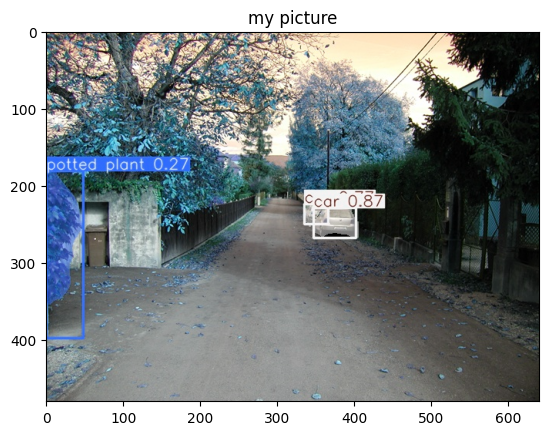

In [16]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('result-0.jpg')
plt.imshow(img)
plt.title('my picture')
plt.show()

### Exercises
* Show all images - see hints
* Run prediction on more images

# Segmentation
Detecting objects is interesting, but sometimes a simple box around an object is not good enough - let's bring in segmentation.

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.pt")  # load an official model

results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image

# Access the results
for result in results:
    xy = result.masks.xy  # mask in polygon format
    xyn = result.masks.xyn  # normalized
    masks = result.masks.data  # mask in matrix format (num_objects x H x W)
    result.save(filename="bus-result.jpg")


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /home/markus/workspaces/trainings/machine-learning/neuralnetwork/yolo/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 2.7ms
Speed: 0.8ms preprocess, 2.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)
6


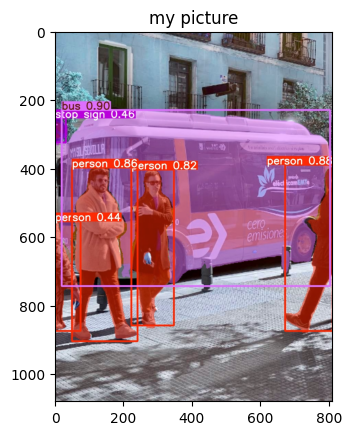

In [21]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('bus-result.jpg')
plt.imshow(img)
plt.title('my picture')
plt.show()

## Exercises
* Segement images from sample data set from detection section
* Output number of vertices for every segmentation

# Hints
How to list all files of a type in a folder

In [13]:
import glob
[img for img in glob.glob("*.jpg")]

['result-0.jpg', 'result.jpg', 'result-1.jpg']